# Exploratory Data Analysis - Clickbait Spoiler Dataset

This notebook analyzes the clickbait spoiler classification dataset to gain insights into the data patterns and characteristics.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

# Set plotting style
sns.set_theme()
%matplotlib inline

In [4]:
# Read the JSONL file
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

df = read_jsonl('../data/train.jsonl')

In [5]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uuid               3200 non-null   object
 1   postId             3200 non-null   object
 2   postText           3200 non-null   object
 3   postPlatform       3200 non-null   object
 4   targetParagraphs   3200 non-null   object
 5   targetTitle        3200 non-null   object
 6   targetDescription  2933 non-null   object
 7   targetKeywords     2116 non-null   object
 8   targetMedia        2685 non-null   object
 9   targetUrl          2717 non-null   object
 10  provenance         3200 non-null   object
 11  spoiler            3200 non-null   object
 12  spoilerPositions   3200 non-null   object
 13  tags               3200 non-null   object
dtypes: object(14)
memory usage: 350.1+ KB
None


In [6]:
# Basic dataset info
print('Dataset Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nSample sizes by tag type:')
print(df['tags'].value_counts())

Dataset Shape: (3200, 14)

Columns: ['uuid', 'postId', 'postText', 'postPlatform', 'targetParagraphs', 'targetTitle', 'targetDescription', 'targetKeywords', 'targetMedia', 'targetUrl', 'provenance', 'spoiler', 'spoilerPositions', 'tags']

Sample sizes by tag type:
tags
[phrase]     1367
[passage]    1274
[multi]       559
Name: count, dtype: int64


In [7]:
# Check missing values
print("-Missing Values:")
print(df.isnull().sum())

-Missing Values:
uuid                    0
postId                  0
postText                0
postPlatform            0
targetParagraphs        0
targetTitle             0
targetDescription     267
targetKeywords       1084
targetMedia           515
targetUrl             483
provenance              0
spoiler                 0
spoilerPositions        0
tags                    0
dtype: int64


In [8]:
df.head()

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags
0,0af11f6b-c889-4520-9372-66ba25cb7657,532quh,"[Wes Welker Wanted Dinner With Tom Brady, But ...",reddit,[It’ll be just like old times this weekend for...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,"new england patriots, ricky doyle, top stories,","[http://pixel.wp.com/b.gif?v=noscript, http://...",http://nesn.com/2016/09/wes-welker-wanted-dinn...,"{'source': 'anonymized', 'humanSpoiler': 'They...",[how about that morning we go throw?],"[[[3, 151], [3, 186]]]",[passage]
1,b1a1f63d-8853-4a11-89e8-6b2952a393ec,411701128456593408,[NASA sets date for full recovery of ozone hole],Twitter,[2070 is shaping up to be a great year for Mot...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,"ozone layer,ozone hole determined by weather,M...",[http://s.m.huffpost.com/assets/Logo_Huffingto...,http://huff.to/1cH672Z,"{'source': 'anonymized', 'humanSpoiler': '2070...",[2070],"[[[0, 0], [0, 4]]]",[phrase]
2,008b7b19-0445-4e16-8f9e-075b73f80ca4,380537005123190784,[This is what makes employees happy -- and it'...,Twitter,"[Despite common belief, money isn't the key to...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,"employee happiness money,employee happiness in...",[http://i.huffpost.com/gen/1359674/images/o-HA...,http://huff.to/1epfeaw,"{'source': 'anonymized', 'humanSpoiler': 'Inte...",[intellectual stimulation],"[[[1, 186], [1, 210]]]",[phrase]
3,31ecf93c-3e21-4c80-949b-aa549a046b93,844567852531286016,[Passion is overrated — 7 work habits you need...,Twitter,"[It’s common wisdom. Near gospel really, and n...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,"business, work-life, careers",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[Purpose connects us to something bigger and i...,"[[[11, 25], [11, 101]], [[17, 56], [17, 85]], ...",[multi]
4,31b108a3-c828-421a-a4b9-cf651e9ac859,814186311573766144,[The perfect way to cook rice so that it's per...,Twitter,"[Boiling rice may seem simple, but there is a ...",Revealed: The perfect way to cook rice so that...,The question 'How does one cook rice properly?...,"Quora,users,share,perfect,way,cook,rice",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[in a rice cooker],"[[[5, 60], [5, 76]]]",[phrase]


In [9]:
def show_text_example():
    # Find example with different texts
    for idx, row in df.iterrows():
        if ' '.join(row['postText']) != row['targetTitle'] and pd.notna(row['targetDescription']):
            print("=== Example of Different Texts ===")
            print(f"Post Text: {row['postText']}")
            print(f"Target Title: {row['targetTitle']}")
            print(f"Description: {row['targetDescription']}")
            print(f"First Paragraph: {row['targetParagraphs'][0]}")
            print(f"spoiler: {row['spoiler']}")
            print(f"spoiler Position: {row['spoilerPositions']}")
            break

show_text_example()

=== Example of Different Texts ===
Post Text: ['Wes Welker Wanted Dinner With Tom Brady, But Patriots QB Had Better Idea']
Target Title: Wes Welker Wanted Dinner With Tom Brady, But Patriots QB Had A Better Idea
Description: It'll be just like old times this weekend for Tom Brady and Wes Welker. Welker revealed Friday morning on a Miami radio station that he contacted Brady because he'll be in town for Sunday's game between the New England Patriots and Miami Dolphins at Gillette Stadium.
First Paragraph: It’ll be just like old times this weekend for Tom Brady and Wes Welker.
spoiler: ['how about that morning we go throw?']
spoiler Position: [[[3, 151], [3, 186]]]


c:\Users\lamia\Documents\DS Study\ANLP\Project\clickbait-spoiling\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lamia\Documents\DS Study\ANLP\Project\clickbait-spoiling\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lamia\Documents\DS Study\ANLP\Project\clickbait-spoiling\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


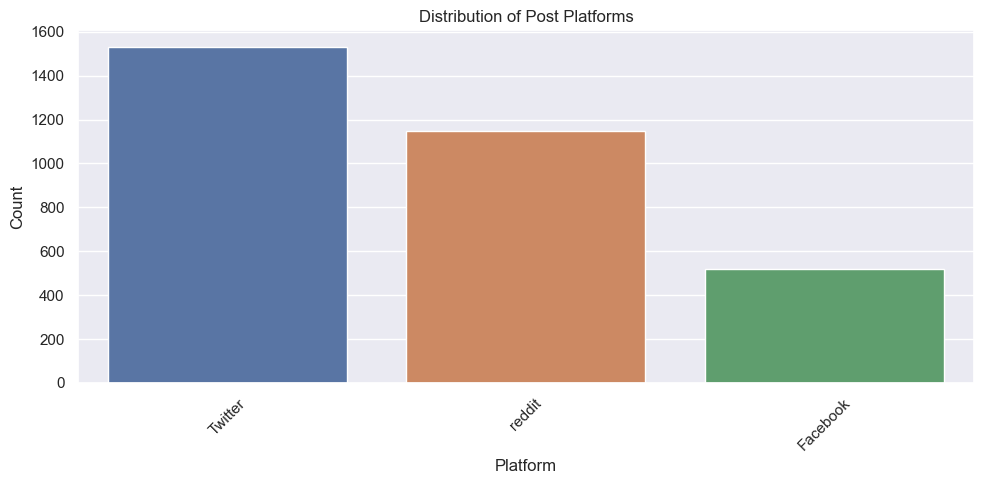

In [10]:
# Analyze post platforms
plt.figure(figsize=(10,5))
# Convert postPlatform to category type and plot
platform_counts = df['postPlatform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Distribution of Post Platforms')
plt.xticks(rotation=45)
plt.xlabel('Platform')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

c:\Users\lamia\Documents\DS Study\ANLP\Project\clickbait-spoiling\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lamia\Documents\DS Study\ANLP\Project\clickbait-spoiling\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


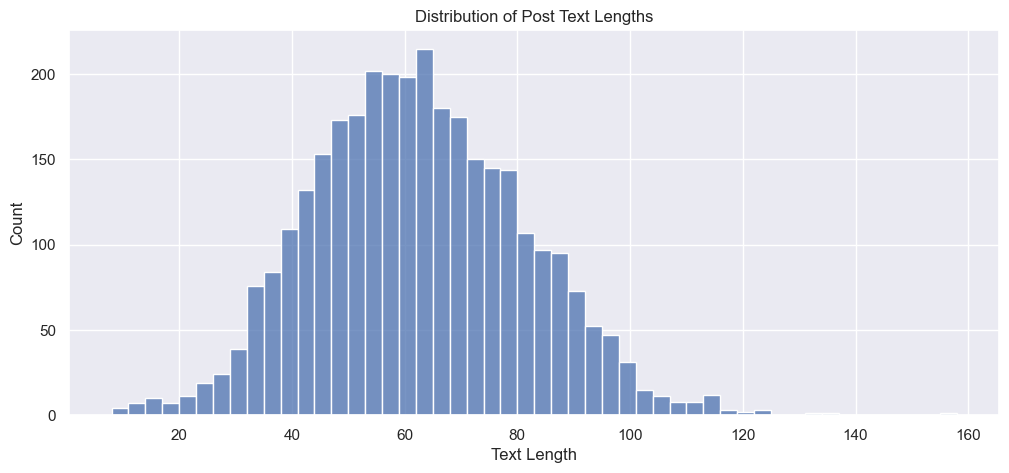

In [11]:
# Analyze text lengths
def get_text_length(text_list):
    return len(' '.join(text_list))

df['post_text_length'] = df['postText'].apply(get_text_length)

plt.figure(figsize=(12,5))
sns.histplot(data=df, x='post_text_length', bins=50)
plt.title('Distribution of Post Text Lengths')
plt.xlabel('Text Length')
plt.show()

c:\Users\lamia\Documents\DS Study\ANLP\Project\clickbait-spoiling\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lamia\Documents\DS Study\ANLP\Project\clickbait-spoiling\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lamia\Documents\DS Study\ANLP\Project\clickbait-spoiling\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


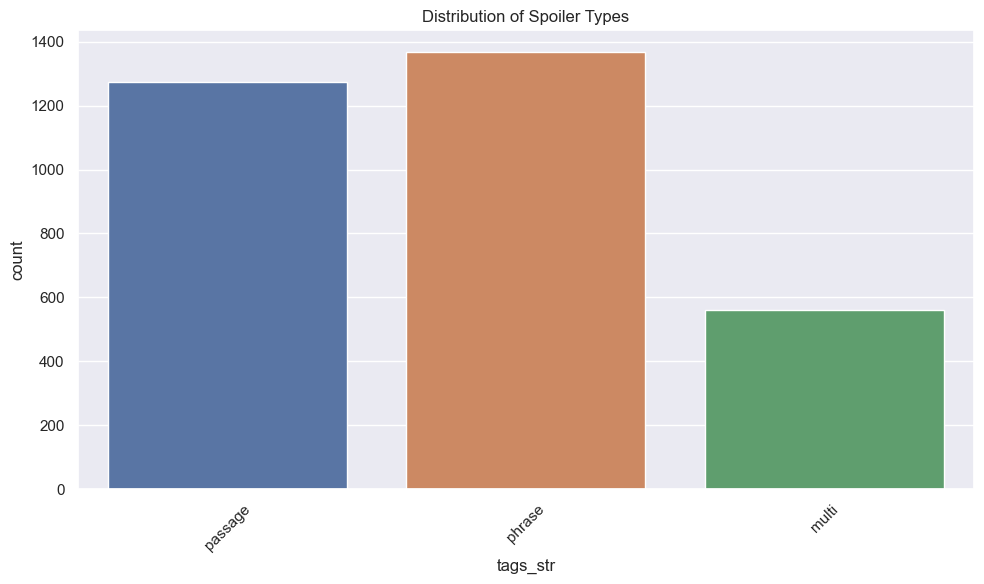


Basic Statistics:
tags_str
phrase     0.427187
passage    0.398125
multi      0.174687
Name: proportion, dtype: float64


In [12]:
# Convert tags from list to string
df['tags_str'] = df['tags'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tags_str')
plt.title('Distribution of Spoiler Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display basic statistics
print("\nBasic Statistics:")
print(df['tags_str'].value_counts(normalize=True))